In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from sklearn.linear_model import LinearRegression
import math
import statsmodels.formula.api as sm

import os
working_directory = os.getcwd()
print(working_directory)

path = working_directory + '/Version2.csv'
GasPrices_df = pd.read_csv(path, encoding='latin-1')
GasPrices_df.head(10)

/Users/willjohnson/Desktop


,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
5,6,Saudi Arabia,"3,302,000",3%,1560.2,2.35,0.62,131.34,"20,110","8,557",5
6,7,Brazil,"2,984,000",3%,221.9,5.36,1.42,299.27,"6,797","1,268",6
7,8,South Korea,"2,605,440",3%,783.4,6.09,1.61,340.52,"31,632","5,194",7
8,9,Canada,"2,486,301",3%,1047.6,6.76,1.79,377.74,"43,258","6,399",6
9,10,Germany,"2,383,393",3%,444.5,7.65,2.02,427.44,"46,208","6,040",14


In [4]:


## Getting overview of a table

GasPrices_df.describe

<bound method NDFrame.describe of       S#                  Country Daily Oil Consumption (Barrels) World Share  \
0      1            United States                      19,687,287         20%   
1      2                    China                      12,791,553         13%   
2      3                    India                       4,443,000          5%   
3      4                    Japan                       4,012,877          4%   
4      5                   Russia                       3,631,287          4%   
..   ...                      ...                             ...         ...   
176  177                   Belize                           4,001          0%   
177  178                     Niue                              51          0%   
178  179  Saint Pierre & Miquelon                             660          0%   
179  180               Montserrat                             400          0%   
180  181                    Tonga                             899          

In [5]:
##Changing world share to float


GasPrices_df['World Share'] = GasPrices_df['World Share'].str.replace('%', '')
GasPrices_df['World Share'] = GasPrices_df['World Share'].astype(float) / 100
GasPrices_df.head()



,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",0.20,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",0.13,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",0.05,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",0.04,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",0.04,383.2,3.41,0.90,190.56,"10,127","2,970",8


In [6]:
##Renaming columns to lower case

GasPrices_df.rename(columns = {'Daily Oil Consumption (Barrels)': 'daily_oil_consumption_barrels', 'Yearly Gallons Per Capita': 
                              'yearly_gallons_per_capita','World Share': 'world_share', 
                               'Price Per Gallon (USD)': 'price_per_gallon_usd', 'GDP Per Capita ( USD )': 'gdp_per_capita_usd', 'Gallons GDP Per Capita Can Buy': 'gallons_gdp_per_capita_can_buy',
                              'Price Per Liter (USD)': 'price_per_liter_usd', 'xTimes Yearly Gallons Per Capita Buy': 'xtimes_yearly_gal'}, inplace = True)
GasPrices_df.head()

,S#,Country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,Price Per Liter (PKR),gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,xtimes_yearly_gal
0,1,United States,"19,687,287",0.20,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",0.13,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",0.05,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",0.04,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",0.04,383.2,3.41,0.90,190.56,"10,127","2,970",8


In [7]:
##Dropping irrelevant columns
GasPrices_df =GasPrices_df.drop(["S#","Price Per Liter (PKR)"], axis = 1) 

GasPrices_df.head()


,Country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,xtimes_yearly_gal
0,United States,"19,687,287",0.20,934.3,5.19,1.37,"63,414","12,218",13
1,China,"12,791,553",0.13,138.7,5.42,1.43,"10,435","1,925",14
2,India,"4,443,000",0.05,51.4,5.05,1.33,"1,901",376,7
3,Japan,"4,012,877",0.04,481.5,4.69,1.24,"40,193","8,570",18
4,Russia,"3,631,287",0.04,383.2,3.41,0.90,"10,127","2,970",8


In [8]:
##Deleting commas from daily oil consumption, and gdp columns
GasPrices_df['daily_oil_consumption_barrels'] = GasPrices_df['daily_oil_consumption_barrels'].str.replace(',','')
GasPrices_df['gdp_per_capita_usd'] = GasPrices_df['gdp_per_capita_usd'].str.replace(',','')
GasPrices_df['gallons_gdp_per_capita_can_buy'] = GasPrices_df['gallons_gdp_per_capita_can_buy'].str.replace(',','')
GasPrices_df.head()


,Country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,xtimes_yearly_gal
0,United States,19687287,0.20,934.3,5.19,1.37,63414,12218,13
1,China,12791553,0.13,138.7,5.42,1.43,10435,1925,14
2,India,4443000,0.05,51.4,5.05,1.33,1901,376,7
3,Japan,4012877,0.04,481.5,4.69,1.24,40193,8570,18
4,Russia,3631287,0.04,383.2,3.41,0.90,10127,2970,8


In [9]:
## Converting daily_oil_consumption_barrels to integer
GasPrices_df['daily_oil_consumption_barrels'] = GasPrices_df['daily_oil_consumption_barrels'].astype(int)
GasPrices_df.dtypes


Country                            object
daily_oil_consumption_barrels       int64
world_share                       float64
yearly_gallons_per_capita         float64
price_per_gallon_usd              float64
price_per_liter_usd               float64
gdp_per_capita_usd                 object
gallons_gdp_per_capita_can_buy     object
xtimes_yearly_gal                   int64
dtype: object

In [10]:
GasPrices_df.head()

,Country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,xtimes_yearly_gal
0,United States,19687287,0.20,934.3,5.19,1.37,63414,12218,13
1,China,12791553,0.13,138.7,5.42,1.43,10435,1925,14
2,India,4443000,0.05,51.4,5.05,1.33,1901,376,7
3,Japan,4012877,0.04,481.5,4.69,1.24,40193,8570,18
4,Russia,3631287,0.04,383.2,3.41,0.90,10127,2970,8


<AxesSubplot:>

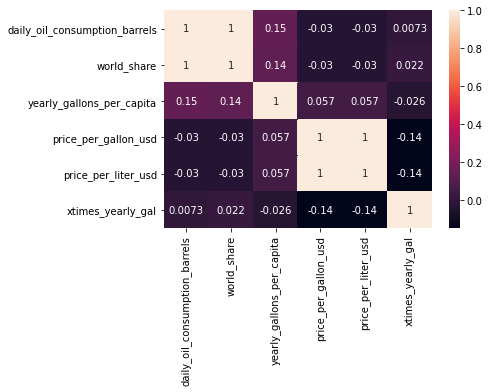

In [11]:
##Looking at initial correlations

Var_Corr = GasPrices_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Looking at the intial information, it appears that there may be a negative relationship between price per gallon USD and daily oil consumption barrels. In other words, as daily oil consumption increases, price per gallon USD decreases and vice versa

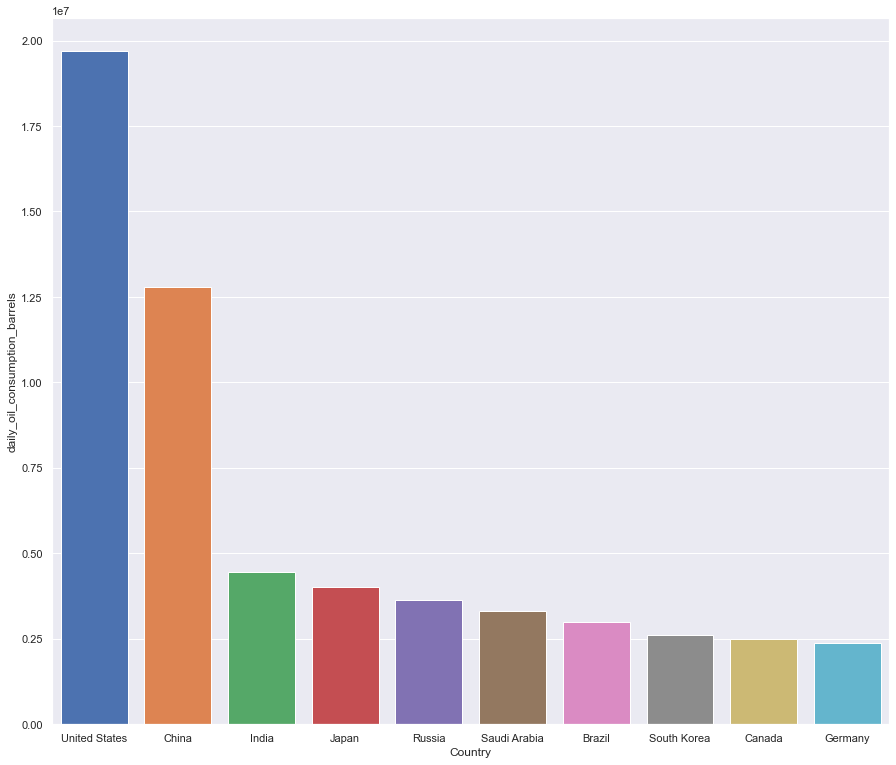

In [13]:
##Top 10 Countries by oil consumption

top_10 = GasPrices_df.nlargest(10, ['daily_oil_consumption_barrels'])
sns.barplot(x = 'Country', y = 'daily_oil_consumption_barrels',
            data = top_10, capsize = 1, saturation = 8, errcolor = 'blue', errwidth = 1,
            ci = 'sd')

sns.set(rc = {'figure.figsize':(15,15)})



The graph above tells us that the US and China consume the most daily oil by far. If we think about these results in the context of the world as we know it, this makes sense.

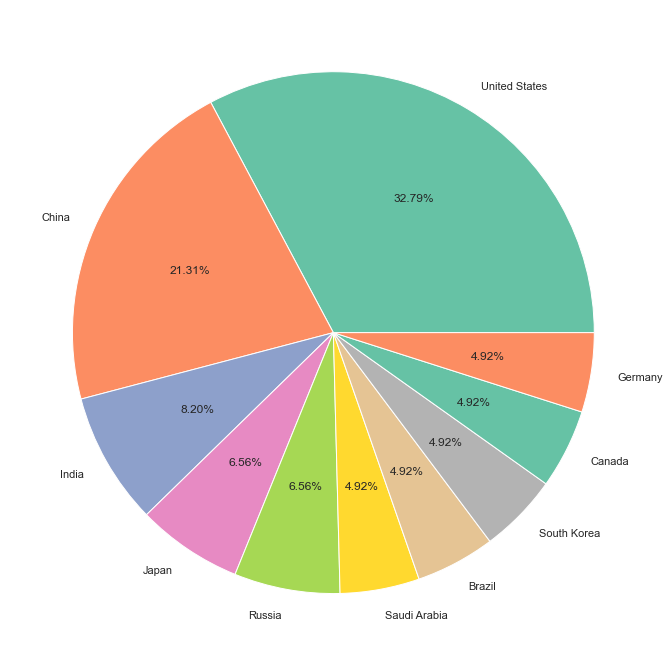

In [31]:
##Top 10 Countries by world share
##Of the top 10 countries, United States and China account for over half of the world share

top_10_share = GasPrices_df.nlargest(10, ['world_share'])
palette_color = sns.color_palette("Set2")
plt.pie(top_10_share['world_share'], labels = top_10_share['Country'], colors=palette_color, autopct='%.2f%%', normalize = True)

plt.show()



The pie chart above further reinforces the previous bar graph. Even when looking at the top 10 countries, the US and China account for 53% of daily oil consumption

In [28]:
##Looking at Regression Results for Price per gallon and daily oil consumption 
est = sm.ols(formula = 'price_per_gallon_usd ~ daily_oil_consumption_barrels', data = GasPrices_df ).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     price_per_gallon_usd   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.005
Method:                   Least Squares   F-statistic:                    0.1609
Date:                  Sat, 02 Jul 2022   Prob (F-statistic):              0.689
Time:                          16:49:41   Log-Likelihood:                -523.20
No. Observations:                   181   AIC:                             1050.
Df Residuals:                       179   BIC:                             1057.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.7333      0.339     16.920      0.000       5.065       6.402
daily_oil_consumption_barrels -7.048e-08   1.76e-07     -0.401      0.689   -4.17e-07    2.76e-07
==============================================================================
Omnibus:                      304.936   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58945.604
Skew:                           7.960   Prob(JB):                         0.00
Kurtosis:                      89.963   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we look at the regression results above, The P-value of .689 is > .05 which is statistically insignificant. This gives me strong lead to believe that the null hypothesis "there is no relationship between the price per gallon and daily oil consumption will not be rejected. However, with the correlation of coefficient being .001, less than 1% of the variation in the data is explained by this model, so take these results with a grain of salt.